In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("/content/bilkav.com_Churn_Modelling.csv")

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = data.iloc[:, 3:13]
Y = data.iloc[:, 13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
X = pd.get_dummies(X)
X.drop("Gender_Female", axis=1, inplace=True)
X.rename(columns = {"Gender_Male": "Gender"}, inplace=True) # male = 1 , female = 0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms1 = MinMaxScaler()
X = mms1.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state= 42)

In [ ]:
from xgboost import XGBClassifier
cls = XGBClassifier()
cls.fit(x_train, y_train)

y_pred = cls.predict(x_test)

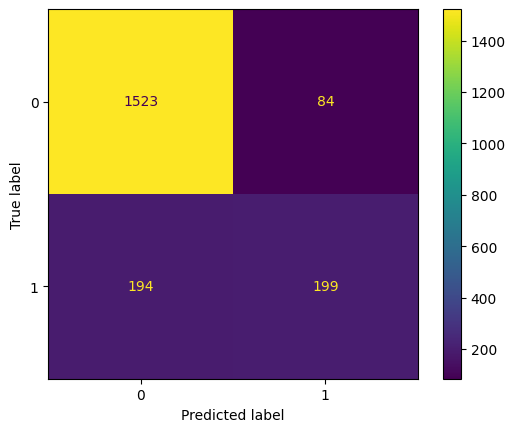

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cls.classes_)

disp.plot()
plt.show()

In [ ]:
target_names = ['Stayed', 'Exited']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Stayed       0.89      0.95      0.92      1607
      Exited       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



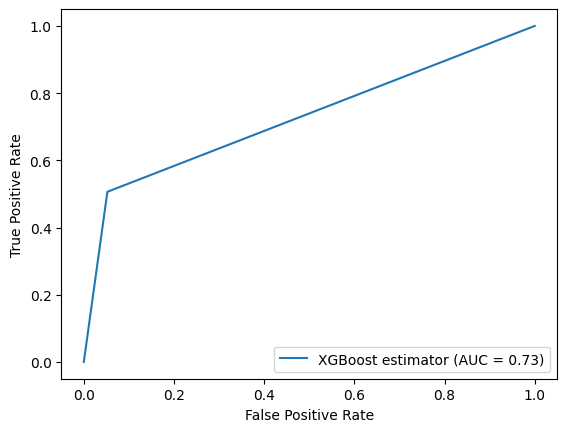

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGBoost estimator')

display.plot()
plt.show()

In [ ]:
#let's focus on only these hyperparameters for now >>> n_estimators, max_depth, learning_rate, reg_alpha, reg_lambda

In [ ]:
cls = XGBClassifier(max_depth = 3, learning_rate=0.1, reg_alpha = 0.05, early_stopping_rounds=5)
cls.fit(x_train, y_train, eval_set= [(x_test, y_test)])

y_pred = cls.predict(x_test)

[0]	validation_0-logloss:0.64372
[1]	validation_0-logloss:0.60302
[2]	validation_0-logloss:0.56942
[3]	validation_0-logloss:0.54118
[4]	validation_0-logloss:0.51709
[5]	validation_0-logloss:0.49594
[6]	validation_0-logloss:0.47661
[7]	validation_0-logloss:0.46028
[8]	validation_0-logloss:0.44754
[9]	validation_0-logloss:0.43594
[10]	validation_0-logloss:0.42509
[11]	validation_0-logloss:0.41601
[12]	validation_0-logloss:0.40758
[13]	validation_0-logloss:0.40067
[14]	validation_0-logloss:0.39488
[15]	validation_0-logloss:0.38862
[16]	validation_0-logloss:0.38391
[17]	validation_0-logloss:0.37917
[18]	validation_0-logloss:0.37496
[19]	validation_0-logloss:0.37188
[20]	validation_0-logloss:0.36879
[21]	validation_0-logloss:0.36579
[22]	validation_0-logloss:0.36277
[23]	validation_0-logloss:0.36037
[24]	validation_0-logloss:0.35692
[25]	validation_0-logloss:0.35494
[26]	validation_0-logloss:0.35283
[27]	validation_0-logloss:0.35123
[28]	validation_0-logloss:0.34990
[29]	validation_0-loglos

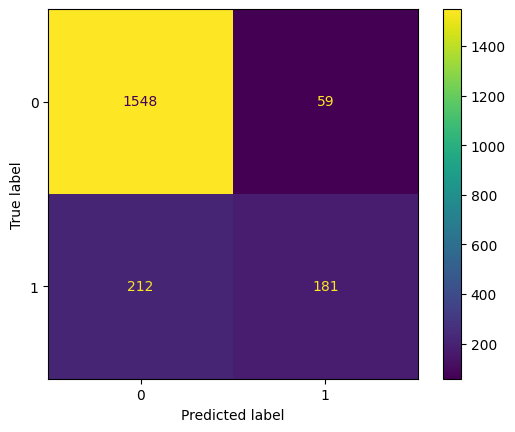

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cls.classes_)

disp.plot()
plt.show()

In [ ]:
target_names = ['Stayed', 'Exited']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Stayed       0.88      0.96      0.92      1607
      Exited       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



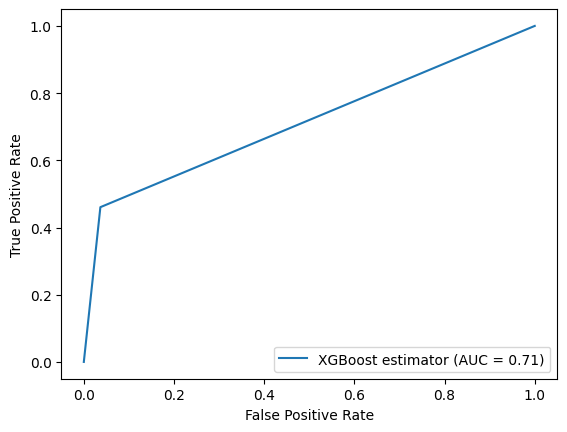

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGBoost estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
def best_ntree_score(estimator, X, y):
    """
    This scorer uses the best_ntree_limit to return
    the best AUC ROC score
    """
    try:
        y_predict = estimator.predict_proba(X,
                                            ntree_limit=estimator.best_ntree_limit)
    except AttributeError:
        y_predict = estimator.predict_proba(X)
    return roc_auc_score(y, y_predict[:, 1])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,4,5,6], 'learning_rate':[0.01, 0.1, 0.3, 0.5], 'reg_lambda': [0.8, 1], 'reg_alpha': [0,0.01, 0.1,0.5]}
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

clf = GridSearchCV(xgb, parameters)
clf.fit(x_train, y_train)

sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_max_depth',
 'param_reg_alpha',
 'param_reg_lambda',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.343267,0.009567,0.005253,0.000088,0.01,3,"{'learning_rate': 0.01, 'max_depth': 3}",0.860000,0.846875,0.853125,0.860625,0.851250,0.854375,0.005259,9
1,0.440497,0.014183,0.005725,0.000108,0.01,4,"{'learning_rate': 0.01, 'max_depth': 4}",0.861250,0.846250,0.860000,0.859375,0.851250,0.855625,0.005863,6
2,0.609809,0.078060,0.008558,0.004615,0.01,5,"{'learning_rate': 0.01, 'max_depth': 5}",0.862500,0.850000,0.863125,0.861875,0.855000,0.858500,0.005163,5
3,0.632961,0.601054,0.005191,0.000049,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",0.870000,0.858125,0.868125,0.863125,0.860625,0.864000,0.004465,1
4,0.435765,0.008052,0.005829,0.000106,0.1,4,"{'learning_rate': 0.1, 'max_depth': 4}",0.871250,0.851875,0.870000,0.859375,0.857500,0.862000,0.007473,4
5,0.552612,0.004307,0.007247,0.001789,0.1,5,"{'learning_rate': 0.1, 'max_depth': 5}",0.868750,0.856875,0.870625,0.862500,0.855625,0.862875,0.006054,2
6,0.332442,0.005940,0.005264,0.000078,0.3,3,"{'learning_rate': 0.3, 'max_depth': 3}",0.868750,0.861875,0.868750,0.859375,0.852500,0.862250,0.006131,3
7,0.790700,0.650846,0.006143,0.000457,0.3,4,"{'learning_rate': 0.3, 'max_depth': 4}",0.862500,0.852500,0.855000,0.858750,0.848125,0.855375,0.004962,7
8,0.540477,0.008769,0.006317,0.000041,0.3,5,"{'learning_rate': 0.3, 'max_depth': 5}",0.856250,0.858125,0.857500,0.849375,0.849375,0.854125,0.003925,10
9,0.329760,0.007296,0.005149,0.000064,0.5,3,"{'learning_rate': 0.5, 'max_depth': 3}",0.859375,0.855625,0.864375,0.843750,0.852500,0.855125,0.006930,8


In [ ]:
#learning rate 0.1 , max_depth 3

In [ ]:
results = pd.DataFrame(clf.cv_results_)

In [ ]:
results.sort_values(by = 'mean_test_score' ,ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.581964,0.011293,0.006755,0.000288,0.1,5,0.01,0.8,"{'learning_rate': 0.1, 'max_depth': 5, 'reg_al...",0.872500,0.861250,0.869375,0.862500,0.855625,0.864250,0.006013,1
38,0.346126,0.009685,0.007220,0.003600,0.1,3,0.5,0.8,"{'learning_rate': 0.1, 'max_depth': 3, 'reg_al...",0.871250,0.858125,0.868750,0.861250,0.861250,0.864125,0.004994,2
54,0.675120,0.187494,0.006707,0.000281,0.1,5,0.5,0.8,"{'learning_rate': 0.1, 'max_depth': 5, 'reg_al...",0.869375,0.856875,0.868750,0.865625,0.859375,0.864000,0.005025,3
34,0.401145,0.117408,0.005442,0.000100,0.1,3,0.01,0.8,"{'learning_rate': 0.1, 'max_depth': 3, 'reg_al...",0.871250,0.856875,0.867500,0.864375,0.860000,0.864000,0.005133,3
33,0.619475,0.556617,0.007250,0.003638,0.1,3,0,1,"{'learning_rate': 0.1, 'max_depth': 3, 'reg_al...",0.870000,0.858125,0.868125,0.863125,0.860625,0.864000,0.004465,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.562059,0.010981,0.006975,0.000486,0.5,5,0,0.8,"{'learning_rate': 0.5, 'max_depth': 5, 'reg_al...",0.843750,0.843750,0.858125,0.840625,0.835000,0.844250,0.007638,124
115,0.568710,0.016600,0.007262,0.001335,0.5,5,0.01,1,"{'learning_rate': 0.5, 'max_depth': 5, 'reg_al...",0.843750,0.842500,0.853750,0.843750,0.835625,0.843875,0.005788,125
122,0.676546,0.007095,0.007180,0.000058,0.5,6,0.01,0.8,"{'learning_rate': 0.5, 'max_depth': 6, 'reg_al...",0.851875,0.845625,0.856875,0.834375,0.830625,0.843875,0.010019,125
114,0.894220,0.532098,0.007349,0.001713,0.5,5,0.01,0.8,"{'learning_rate': 0.5, 'max_depth': 5, 'reg_al...",0.849375,0.838750,0.849375,0.841875,0.835625,0.843000,0.005568,127


In [ ]:
#learning_rate 0.1	, max_depth 5 , reg_alpha	0.01 , reg_lambda	0.8

In [ ]:
cls = XGBClassifier(max_depth = 5, learning_rate=0.1, reg_alpha = 0.01, reg_lambda=0.8)
cls.fit(x_train, y_train)

y_pred = cls.predict(x_test, iteration_range = [0,5] )

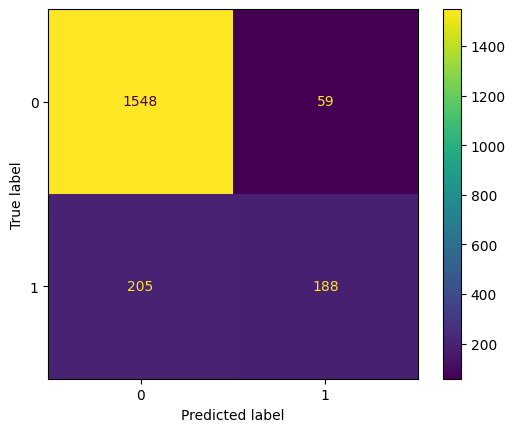

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cls.classes_)

disp.plot()
plt.show()

In [ ]:
target_names = ['Stayed', 'Exited']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Stayed       0.88      0.96      0.92      1607
      Exited       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



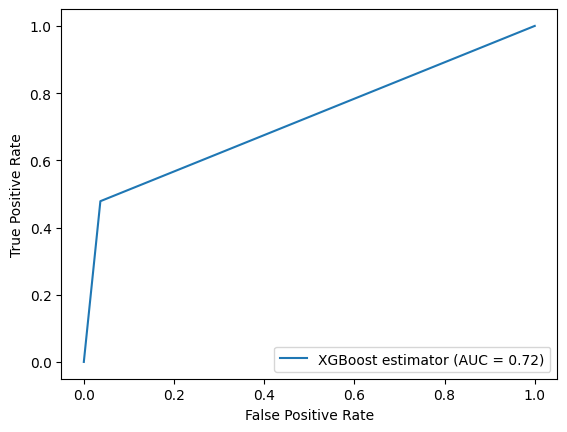

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGBoost estimator')

display.plot()
plt.show()

In [ ]:
#still not satisfied..